<a href="https://colab.research.google.com/github/GianBallesteros/Skyline-Math-200/blob/main/(1)_Final_Python_Notebook_Setup_by_Gian_Ballesteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 1 : Is there an association between the amount of siblings a person has and if they are currently living alone?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1: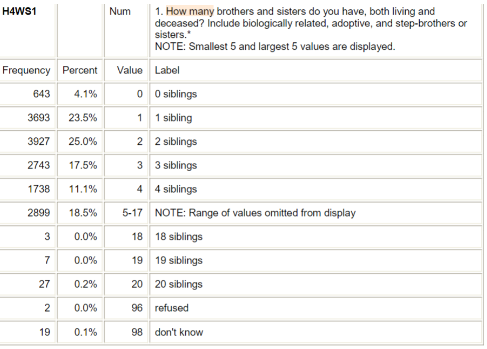


In [ ]:
#Manage data for variable 1

In [21]:
df['H4WS1'].dtype

dtype('O')

In [22]:
df['Number_of_siblings'] = df['H4WS1']
df['Number_of_siblings'].dtype

dtype('O')

In [23]:
df['Number_of_siblings'] = pd.to_numeric( df['Number_of_siblings'] , errors='coerce')
df['Number_of_siblings'].dtype

dtype('float64')

In [24]:
df['Number_of_siblings'].describe()

count    5114.000000
mean        3.084083
std         4.994381
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        98.000000
Name: Number_of_siblings, dtype: float64

In [25]:
df['Number_of_siblings'] = df['Number_of_siblings'].loc[ df['Number_of_siblings'] < 96]
df['Number_of_siblings'].max()

20.0

In [26]:
df['Number_of_siblings'].mean()

2.879874583578287

In [27]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
#import researchPy
import researchpy as rp

In [29]:
rp.summary_cont(df['Number_of_siblings'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Number_of_siblings,5103.0,2.8799,2.3677,0.0331,2.8149,2.9449


In [30]:
rp.summarize(df['Number_of_siblings'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,Number_of_siblings,5103,2.8799,2.0,5.6059,2.3677,0.0331,"[2.8149, 2.9449]"


In [31]:
df['Number_of_siblings'].describe()

count    5103.000000
mean        2.879875
std         2.367681
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: Number_of_siblings, dtype: float64

In [32]:
import seaborn as sns

In [ ]:
#Graphs and tables or statistics

<Axes: xlabel='Number_of_siblings', ylabel='Count'>

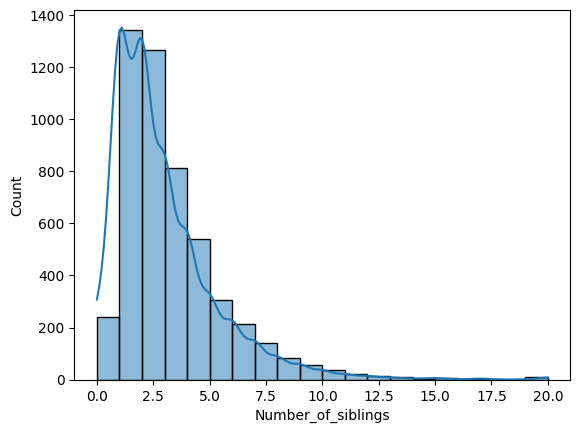

In [33]:
sns.histplot(x = 'Number_of_siblings', data = df, bins = 20, kde = True)

<Axes: xlabel='Percent', ylabel='Number_of_siblings'>

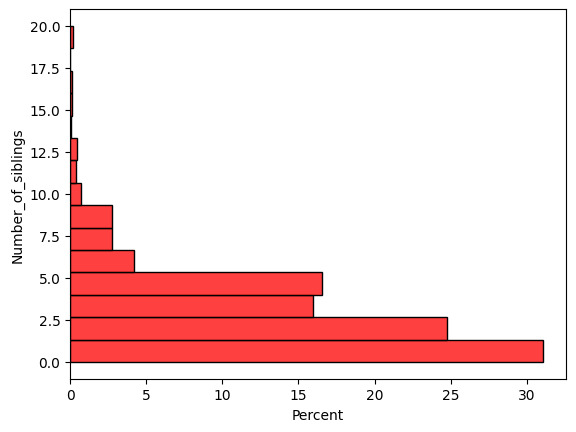

In [34]:
sns.histplot(y = 'Number_of_siblings', data =df, stat='percent', bins = 15, color = 'red')

<Axes: xlabel='Number_of_siblings'>

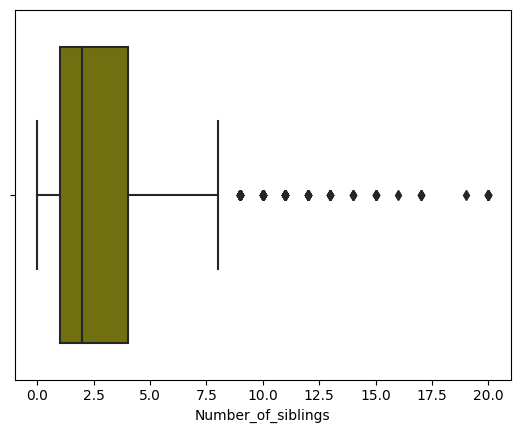

In [35]:
sns.boxplot(x = 'Number_of_siblings', data = df, color = 'olive')

Codebook 2: 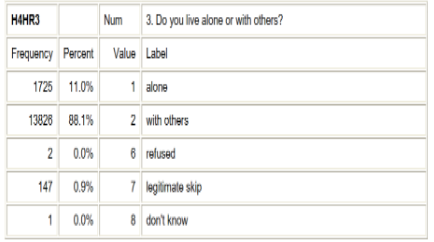

In [ ]:
#Manage data for variable 2

In [36]:
df['H4HR3'].value_counts()

2    4456
     1390
1     595
7      61
8       1
6       1
Name: H4HR3, dtype: int64

In [37]:
df['Living_Status'] = df['H4HR3']
df['Living_Status'].value_counts()

2    4456
     1390
1     595
7      61
8       1
6       1
Name: Living_Status, dtype: int64

In [38]:
df['Living_Status'] = df['Living_Status'].loc[ df['Living_Status'] !=' ']
df['Living_Status'] = df['Living_Status'].loc[ df['Living_Status'] !='6']
df['Living_Status'] = df['Living_Status'].loc[ df['Living_Status'] !='7']
df['Living_Status'] = df['Living_Status'].loc[ df['Living_Status'] !='8']

df['Living_Status'].value_counts()

2    4456
1     595
Name: Living_Status, dtype: int64

In [39]:
df['Living_Status'].replace(['1','2'] , ['alone','with others'] , inplace = True)
df['Living_Status'].value_counts()


with others    4456
alone           595
Name: Living_Status, dtype: int64

In [40]:
pip install researchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#import researchPy
import researchpy as rp

In [43]:
rp.summary_cat(df['Living_Status'])

,Variable,Outcome,Count,Percent
0,Living_Status,with others,4456,88.22
1,,alone,595,11.78


In [42]:
#Graphs and tables or statistics

In [44]:
import matplotlib.pyplot as plt

<Axes: ylabel='Living_Status'>

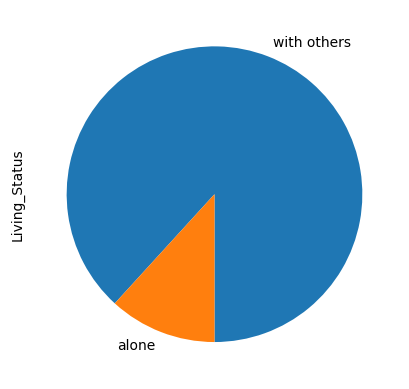

In [45]:
df['Living_Status'].value_counts().plot(kind ='pie',startangle = 270)

<Axes: ylabel='Living_Status'>

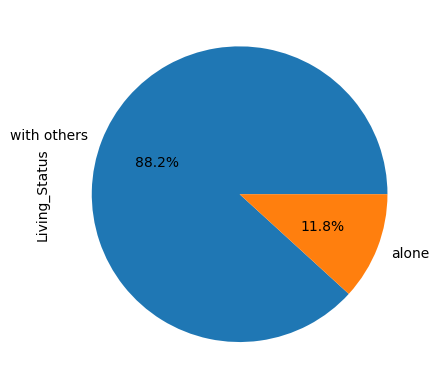

In [46]:
df['Living_Status'].value_counts().plot(kind ='pie', autopct='%1.1f%%', )

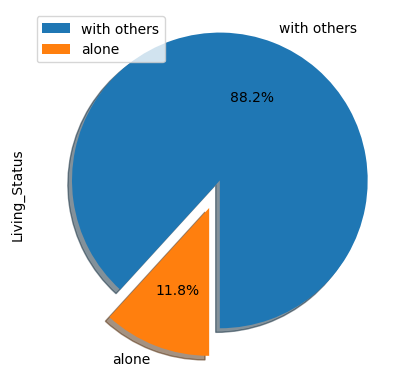

In [47]:
explode = (0.1, 0.1)
df['Living_Status'].value_counts().plot(kind ='pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=270)
plt.legend(loc ="upper left")

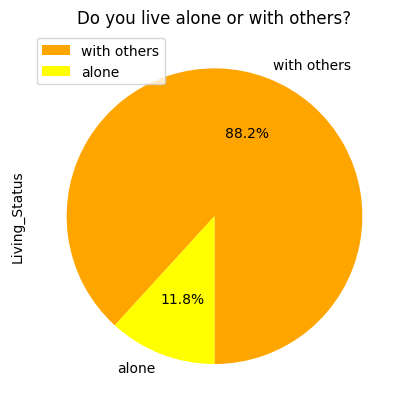

In [48]:
plt.title("Do you live alone or with others?")
df['Living_Status'].value_counts().plot(kind ='pie', autopct='%1.1f%%', startangle=270, colors=['orange', 'yellow'])
plt.legend(loc ="upper left")

<Axes: >

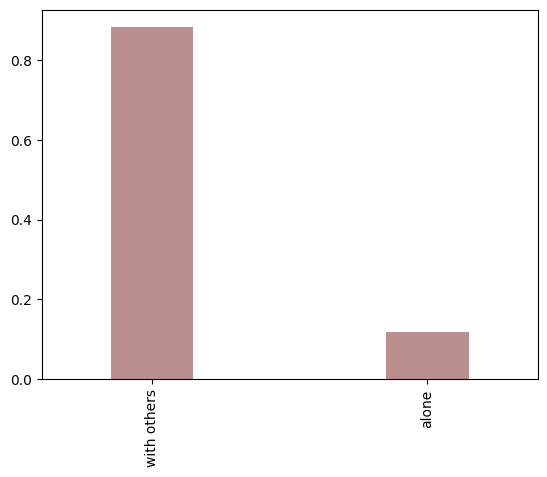

In [49]:
df['Living_Status'].value_counts(normalize = True).plot(kind ='bar', color = 'rosybrown', width = 0.3)